# Prosper Loan Data Exploration
## By: Ayobami Dan Yusuf

## Introduction
> Prosper Marketplace was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than 21 billion USD in loans to over 1.3 milliom people. Borrowers apply online for a fixed-rate, fixed-term loan between 2000 USD and 40000 USD. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. <p>In this project, I take a deep dive into Prosper Loans' data, curate questions neccessary for exploring and understanding how Prosper Loans have performed over time and factors that determine the Annual Percentage Rate (APR), and create visualizations to answer these questions, and to aid better communication and understanding of key insights gleaned from the data. <p> The data set used to complete this project contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

## Preliminary Wrangling 
#### (With main focus on **Data Gathering**)


In [1]:
#importing all packages and setting plots to be embedded inline using the inline magic keyword

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> Next, I load in the dataset and describe its properties through the questions below.

In [2]:
#loading the data in its raw state into a pandas dataframe
#then displaying first 5 rows to have a glimpse of the dataframe
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#displaying a high-level overview of the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
#checking for the percentage of missing data in each column to aid decision about how to treat missing data
loan_data.isnull().sum()/len(loan_data)*100

ListingKey                              0.000000
ListingNumber                           0.000000
ListingCreationDate                     0.000000
CreditGrade                            74.588588
Term                                    0.000000
LoanStatus                              0.000000
ClosedDate                             51.649596
BorrowerAPR                             0.021942
BorrowerRate                            0.000000
LenderYield                             0.000000
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
Occupation                              3.149109
EmploymentStatus                        1.979164
EmploymentStatusDura

### The structure of Prosper dataset:

> The dataset includes 113,937 loans in the dataset with 81 features. Most variables are numeric (floats) with many features containing mostly missing data.

### Main feature(s) of interest in the dataset:

> As a Sales Performance Analyst, I'm mainly interested in uncovering variables that drives Prosper's growth and identify areas of business opportunities. Linking certain variables to low and high performance will enable management develop strategies to improve business operations

### Features in the dataset that will help support investigation into feature(s) of interest:

> To aid my ivestigation of the main features of interest in the dataset, I consider the following variables important:
- Term: The duration of the Loan (in months).
- LoanStatus: The status of the loan (whether completed, past due, ongoing, or defaulted).
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: Borrower's Interest Rate on the loan.
- BorrowerState: The state where the borrower lives.
- EstimatedLoss: Estimated Principal loss.
- ProsperScore: Customer Risk Score
- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState: The state where the borrower resides.
- Occupation: Borrower's occupation
- EmploymentStatus: Employment status, when listing was created.
- EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.
- IsBorrowerHomeowner: Whether the borrower owns a home or not.
- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
- StatedMonthlyIncome: The monthly income of the borrower stated at the time the loan was issued.
- OriginalLoanAmount: The amount of the loan disbursed.
- MonthlyPayment: The monthly installment amount.
- LoanOriginationDate: The date at which the loan was issued.

### Isolating the variables of interest

In [5]:
#first, I make a copy of the original data
loan_data_copy = loan_data.copy()

In [6]:
loan_data_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
#obtaining a list of all columns to guide subseting efforts
loan_data_copy.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
#defining a list of needed variables

vars_needed = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState', 'EstimatedLoss', 'ProsperScore', 
               'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'Occupation', 
               'EmploymentStatus', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 
               'MonthlyLoanPayment', 'LoanOriginationDate', 'LoanOriginationQuarter']
               
                
               

#subseting the dataset for only variables of interest
loan_df = loan_data_copy[vars_needed]
loan_df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,BorrowerState,EstimatedLoss,ProsperScore,ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,LoanOriginationDate,LoanOriginationQuarter
0,36,Completed,0.16516,0.1580,CO,NaN,NaN,NaN,0,Other,Self-employed,True,0.17,3083.333333,9425,330.43,9/12/2007 0:00,Q3 2007
1,36,Current,0.12016,0.0920,CO,0.0249,7.0,A,2,Professional,Employed,False,0.18,6125.000000,10000,318.93,3/3/2014 0:00,Q1 2014
2,36,Completed,0.28269,0.2750,GA,NaN,NaN,NaN,0,Other,Not available,False,0.06,2083.333333,3001,123.32,1/17/2007 0:00,Q1 2007
3,36,Current,0.12528,0.0974,GA,0.0249,9.0,A,16,Skilled Labor,Employed,True,0.15,2875.000000,10000,321.45,11/1/2012 0:00,Q4 2012
4,36,Current,0.24614,0.2085,MN,0.0925,4.0,D,2,Executive,Employed,True,0.26,9583.333333,15000,563.97,9/20/2013 0:00,Q3 2013


## Preliminary Wrangling
#### (With main focus on Inspection and Cleaning)

In [9]:
#displaying a high-level overview of the new dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
BorrowerState                108422 non-null object
EstimatedLoss                84853 non-null float64
ProsperScore                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113937 non-null float64
LoanOriginationDate          113937 non-null object
LoanOr

In [10]:
#comverting LoanOriginationDate to datetime type so I could extract the year
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

#engineering the Year feature
loan_df['LoanYear'] = pd.DatetimeIndex(loan_df['LoanOriginationDate']).year

In [11]:
#test to check wether Year feature was correctly engineered
print(loan_df['LoanYear'].head())

print(loan_df.info())

0    2007
1    2014
2    2007
3    2012
4    2013
Name: LoanYear, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
BorrowerState                108422 non-null object
EstimatedLoss                84853 non-null float64
ProsperScore                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
StatedMonthlyIncome          113937 non-null float64
LoanOriginalAmount           113937 non-null int64
MonthlyLoanPayment           113

## Univariate Exploration

> In this section, I investigate distributions of individual variables. The idea is to uncover patterns,
unusual points or outliers, take a deeper look to clean things up
and prepare myself to look at relationships between variables.

### Question 1: What is the distribution of Loan Listing Category?
#### More specifically, what reasons for taking loans are most popular?

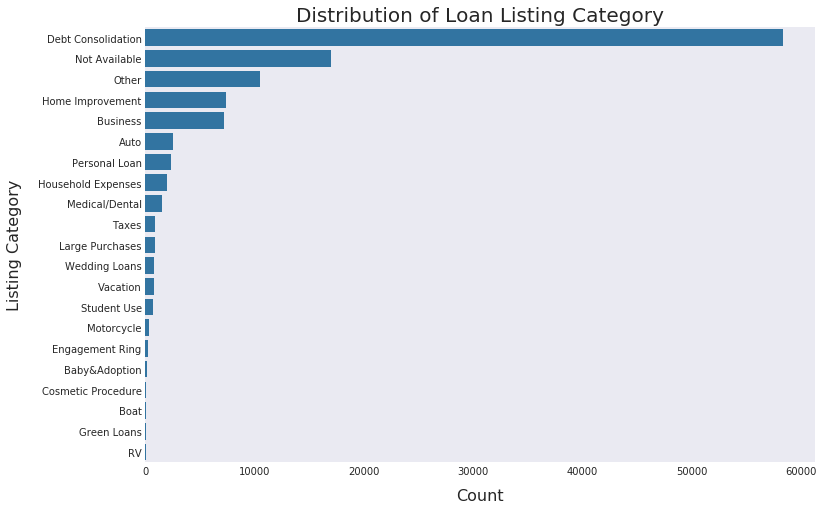

In [12]:
#first, I define a function to replace "ListingCategory (numeric)" values with a more descriptive text valuesfe
def replace_num (numeric):
    reasons_dict = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return reasons_dict[numeric]

#next, i add the "ListingCategory" column to the Dataframe to hold the text values for "ListingCategory (numeric)"
loan_df['ListingCategory'] = loan_df['ListingCategory (numeric)'].apply(replace_num)

#finally, I drop the "ListingCategory (numeric)" column as it's no longer needed
loan_df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

#next I plot the distribution of loan category
plt.figure(figsize=[12,8])
sns.set_style('dark', {'xtick.bottom': True})
base_color=sns.color_palette()[0]

sns.countplot(data=loan_df, y='ListingCategory', color=base_color, order=loan_df['ListingCategory'].value_counts().index)
plt.ylabel('Listing Category', labelpad=16, fontsize=16)
plt.xlabel('Count', labelpad=12, fontsize=16)
plt.title('Distribution of Loan Listing Category', fontsize=20);

> Debt Consolidation category has the largest portion of listings, followed by categories that were not stated as at when the listing was started. Other, Business, Home Improvement are also top reasons for taking loans. It is interesting to see that Other category is about half the volume of Debt Consolidation, ahead of Business and Home Improvement. Generally, we can conclude that almost half of Prosper borrowers took loans for debt consolidation, with most of the other half for Home Improvement, Business and other (not stated) purposes.

### Question 2: Where does Prosper have most of its customers, and where do we have to intensify marketing efforts?

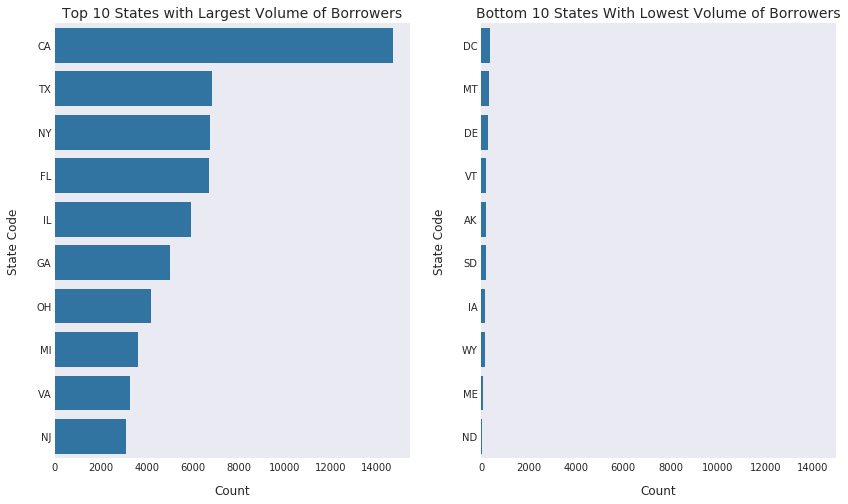

In [13]:
#first, I get a lsit of Top and bottom 10 states with the largest and lowest volume of borrowers
top10_states = loan_df['BorrowerState'].value_counts()[:10].index.tolist()
top10_states_count = loan_df['BorrowerState'].value_counts()[:10].values.tolist()

bottom10_states = loan_df['BorrowerState'].value_counts()[-10:].index.tolist()
bottom10_states_count = loan_df['BorrowerState'].value_counts()[-10:].values.tolist()

#next, I set up the axis to plot the distribution
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, sharex=False,
                          figsize=(14,8))
base_color = sns.color_palette()[0]
                                   
#then I plot the distribution of Top 10 States with largest volume of Borrowers in the US
sns.barplot(x=top10_states_count, y=top10_states, ax=ax1, color=base_color)
ax1.set_title('Top 10 States with Largest Volume of Borrowers', fontsize=14)
ax1.set_xlabel('Count', labelpad=12, fontsize=12)
ax1.set_ylabel('State Code', labelpad=16, fontsize=12)

#lastly, I plot the distribution of Bottom 10 States with largest volume of Borrowers in the US
sns.barplot(x=bottom10_states_count, y=bottom10_states, ax=ax2, color=base_color)
ax2.set_title('Bottom 10 States With Lowest Volume of Borrowers', fontsize=14)
ax2.set_xlim(0, 15000)
ax2.set_xlabel('Count', labelpad=12, fontsize=12)
ax2.set_ylabel('State Code', labelpad=16, fontsize=12)
plt.show()

> It is clear from the output of the charts above that **California** is the state with the most number of borrowers, followed by Texas and New York in the top 3 states with the largest volume of borrowers.<p>
**North Dakota** is the state with the least number of borrowers. We have Wyoming, Maine and North Dakota in the bottom 3 of states with the least number of borrowers

### Question 3: What is the Distribution of Prosper Borrowers by Employment Status?

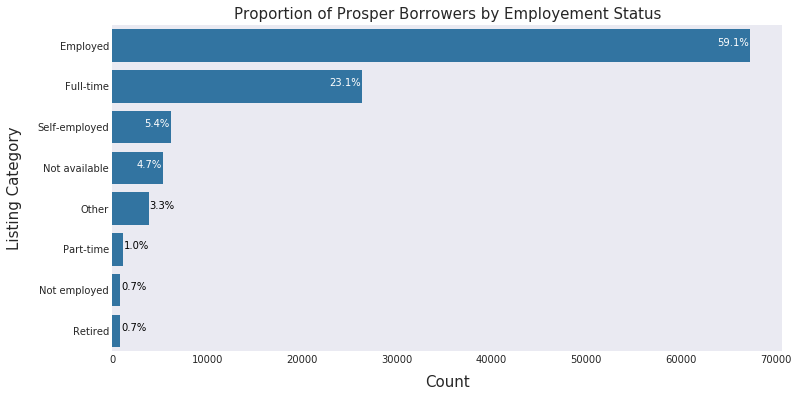

In [14]:
#setting up the vlaues to plot in the dataframe
emp_cnt=loan_df.EmploymentStatus.value_counts()
emp_pct=loan_df.EmploymentStatus.value_counts()/loan_df.shape[0]*100

#plot area and axis settings, and plotting the data
plt.figure(figsize=[12, 6])
ax = sns.countplot(y='EmploymentStatus', data=loan_df, order=loan_df.EmploymentStatus.value_counts().index, 
                   color=base_color)

#writing a loop to get value labels from the calculations made from the data
locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = emp_cnt[label.get_text()]
    pct = emp_pct[label.get_text()]
    if pct>=4:
        plt.text(cnt-120, loc, '{:0.1f}%'.format(pct), ha = 'right', color = 'w')
    else:
        plt.text(cnt+110, loc, '{:0.1f}%'.format(pct), ha = 'left', color = 'k')
        
#labels settings        
plt.ylabel('Listing Category', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Proportion of Prosper Borrowers by Employement Status', fontsize=15);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

> We see from the chart populated above that almost 90% of Prosper borrowers are employed and the proportion of those who don't weren't working is below 5%. 

### Question 4: Seeing that most of Prosper Borrowers are employed, what professions are most popular among Prosper borrowers?

> There are 67 occupations listed in the dataset, and they are too many to understand when plotted on a bar chart. What can be done is to group them into to 9 broad categories in accordance with the **[International Standard Classification of Occupations ISCO](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Occupations)**

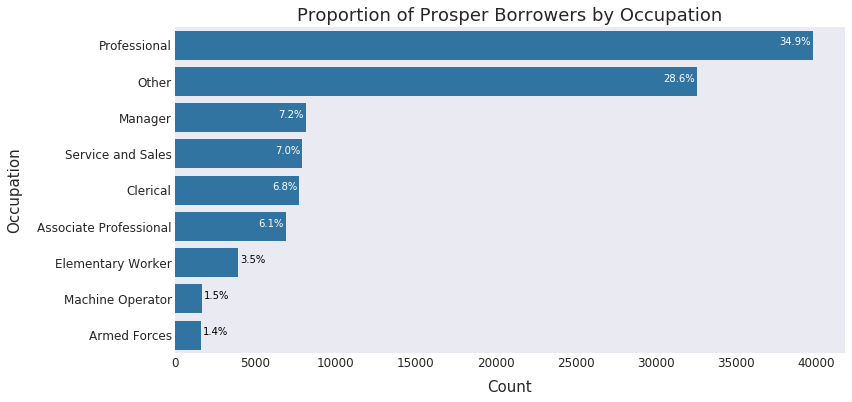

In [15]:
#dictionary of redundant occupation names paired with standardized names they are to be replaced with
jobCat_dict = {
    'Accountant/CPA': 'Professional',  'Professionals': 'Professional',
    'Police Officer/Correction Officer': 'Professional', 'Sales - Retail': 'Service and Sales',
    'Administrative Assistant': 'Clerical',   'Other': 'Other', 'Construction': 'Elementary Worker',
    'Executive': 'Manager', 'Medical Technician': 'Associate Professional',   
    'Truck Driver': 'Machine Operator', 'Food Service': 'Service and Sales',
    'Postal Service': 'Clerical', 'Principal': 'Professional',
    'Teacher': 'Professional', 'Analyst': 'Professional', 'Engineer - Mechanical': 'Professional',  
    'Computer Programmer': 'Professional', 'Civil Service': 'Professional',
    'Pilot - Private/Commercial': 'Professional', 'Nurse (RN)': 'Associate Professional',
    'Fireman': 'Associate Professional', 'Sales - Commission': 'Service and Sales',
    'Clerical': 'Clerical', 'Engineer - Electrical': 'Professional',
    'Tradesman - Electrician': 'Associate Professional', 'Retail Management': 'Manager',
    'Laborer': 'Elementary Worker', 'Student - College Sophomore': 'Other',
    'Clergy': 'Professional', 'Military Officer': 'Armed Forces',
    'Food Service Management': 'Manager', 'Military Enlisted': 'Armed Forces',
    'Waiter/Waitress': 'Service and Sales', 'Attorney': 'Professional',
    'Tradesman - Mechanic': 'Associate Professional', 'Pharmacist': 'Professional',
    'Social Worker': 'Associate Professional', 'Skilled Labor': 'Other', 'Realtor': 'Professional',
    'Religious': 'Professional', 'Professor': 'Professional', 'Flight Attendant': 'Service and Sales',
    'Scientist': 'Professional', 'Student - College Senior': 'Other', 'Nurse (LPN)': 'Professional',
    'Investor': 'Other', "Teacher's Aide": 'Clerical', 'Bus Driver': 'Elementary Worker',
    'Student - College Freshman': 'Other', 'Car Dealer': 'Other', 'Homemaker': 'Other',
    "Nurse's Aide": 'Associate Professional', 'Architect': 'Professional',
    'Landscaping': 'Elementary Worker', 'Doctor': 'Professional', 'Student - College Graduate Student': 'Other',
    'Tradesman - Carpenter': 'Associate Professional', 'Student - College Junior': 'Other',
    'Dentist': 'Professional', 'Student - Technical School': 'Other', 'Student - Community College': 'Other',
    'Engineer - Chemical': 'Professional', 'Tradesman - Plumber': 'Associate Professional',
    'Chemist': 'Professional', 'Biologist': 'Professional', 'Psychologist': 'Professional', 'Judge': 'Professional'
}    

#replcing the redundant profession names with standardized names
loan_df['Occupation'].replace(jobCat_dict, inplace=True)

#define label values in percent format
oc_cnt=loan_df.Occupation.value_counts()
oc_pct=loan_df.Occupation.value_counts()/loan_df.shape[0]*100

#set axis settings and plot the distribution of borrowers by occupation
plt.figure(figsize=[12, 6])
ax = sns.countplot(y='Occupation', data=loan_df, order=loan_df.Occupation.value_counts().index, color=base_color)

locs, labels = plt.yticks()
for loc, label in zip(locs, labels):
    cnt = oc_cnt[label.get_text()]
    pct = oc_pct[label.get_text()]
    if pct>=4:
        plt.text(cnt-130, loc, '{:0.1f}%'.format(pct), ha = 'right', color = 'w')
    else:
        plt.text(cnt+110, loc, '{:0.1f}%'.format(pct), ha = 'left', color = 'k')
        
plt.ylabel('Occupation', labelpad=15, fontsize=15)
plt.xlabel('Count', labelpad=10, fontsize=15)
plt.title('Proportion of Prosper Borrowers by Occupation', fontsize=18);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

> **Professional** job category makes up the largest chunk of borrowers at Prosper with almost **35%** of total borrowers representing the group. With **"Other"** category representing the second largest category, at **28.6%** which is a significant proportion, it becomes really hard to tell the real distribution of of this group of borrowers and other professions as well. But, one thing we can tell is that people in the **Armed Forces** took up less loans with Prosper compared to other porfessions.

### Question 5: How do Prosper Borrowers who Own a Home Compare to those who Don't?

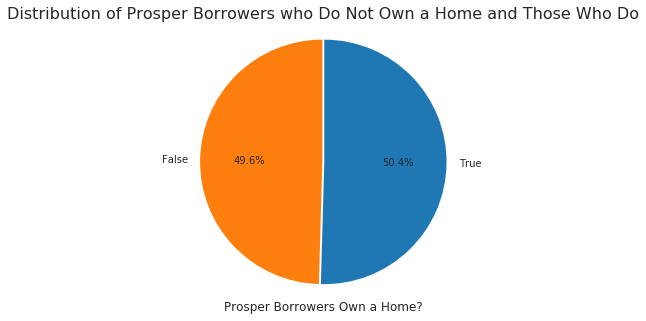

In [16]:
#defining values to plot
sorted_counts = loan_df['IsBorrowerHomeowner'].value_counts()

#figure settings
plt.figure(figsize=[8,5])

#plotting
plt.pie(sorted_counts, labels = sorted_counts.index, autopct = '%1.1f%%',
        explode =[0.008, 0.008], startangle = 90, counterclock = False)
plt.xlabel("Prosper Borrowers Own a Home?", size = 12)
plt.title("Distribution of Prosper Borrowers who Do Not Own a Home and Those Who Do",
         size = 16)
plt.axis('square');

> From the output of the chart above, the distribution is somewhat **50-50**, and this makes it clear that **owning a home** isn't really a factor for collecting loans for Prosper borrowers, which explains why **"Home Maintenance"** saw a little representation in the chart that shows top reasons why Prosper borrowers took out loans.

### Question 6: What is the rate of completion of repayment or default on Prosper Loans?

In [17]:
#inspect the Loan Status column to see how best to work it
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

> The unique values in the **LoanStatus** column is too much and redundant to understand. I will replace the redundant status wiht a easier to understand one. <p> The logic is that No matter the number of days a Loan is past due, I'll regard all as **Past Due** and the Ones with "FinalPaymentInProgress" will be regarded as ongoing and will treated as **Current**.

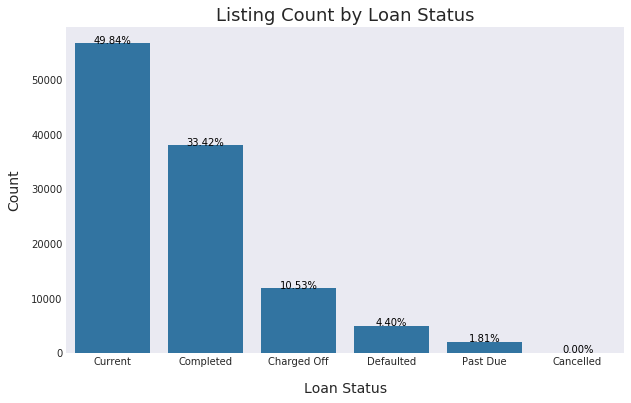

In [18]:
#create dictionary to pair redundant statuses with more standard ones
status_dict = {"Current":"Current", "Completed":"Completed", "Chargedoff":"Charged Off", "Defaulted":"Defaulted",
              "Past Due (1-15 days)":"Past Due", "Past Due (31-60 days)":"Past Due",
             "Past Due (61-90 days)":"Past Due", "Past Due (91-120 days)":"Past Due", "Past Due (16-30 days)":"Past Due",
             "FinalPaymentInProgress":"Current", "Past Due (>120 days)":"Past Due", "Cancelled":"Cancelled"}

#replace the status names
loan_df['LoanStatus'].replace(status_dict, inplace=True)

#plot the distribution
ls_cnt=loan_df['LoanStatus'].value_counts()
ls_pct=loan_df['LoanStatus'].value_counts()/loan_df.shape[0]*100

plt.figure(figsize=[10, 6])
ax = sns.countplot(x='LoanStatus', data=loan_df, order=loan_df.LoanStatus.value_counts().index, color=base_color)

locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    cnt = ls_cnt[label.get_text()]
    pct = ls_pct[label.get_text()]
    if pct>5:
        plt.text(loc, cnt-190, '{:0.2f}%'.format(pct), ha = 'center', color = 'k')
    else:
        plt.text(loc, cnt+50, '{:0.2f}%'.format(pct), ha = 'center', color = 'k')
        
plt.xlabel('Loan Status', labelpad=15, fontsize=14)
plt.ylabel('Count', labelpad=10, fontsize=14)
plt.title('Listing Count by Loan Status', fontsize=18);

> The summary of this is that there is **low default rate** amongst Prosper borrowers, as only about **6%** of total borrowers are either defaulters or have their loans due withing 4 months

### Question 7: What is the Trend of Loan Listings over the Years?

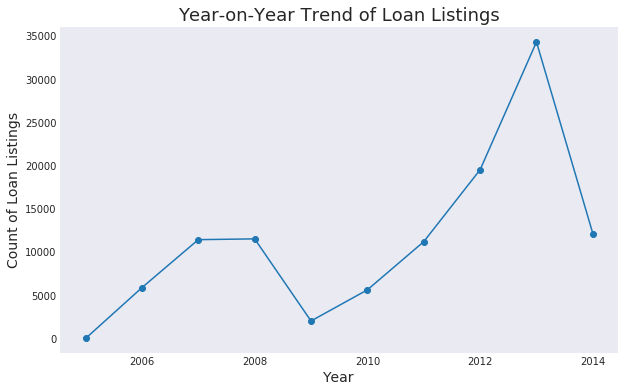

In [19]:
plt.figure(figsize=[10,6])
loan_df['LoanYear'].value_counts().sort_index().plot(kind='line', marker = 'o')
plt.xlabel('Year', size = 14)
plt.ylabel('Count of Loan Listings', size = 14)
plt.title('Year-on-Year Trend of Loan Listings', size=18);

> It is interesting to see that **2013** saw a rapid shoot in the number of Loan Listings posted by Prosper. Further **[research](https://news.fintechnexus.com/april-2013-lending-club-prosper)** revealed that this surge was more prominent during early **Q2 (April**, specifically**)**

### Question 8: What is the Distribution of the Prosper Borrowers' Annual Percentage Rate (APR)?

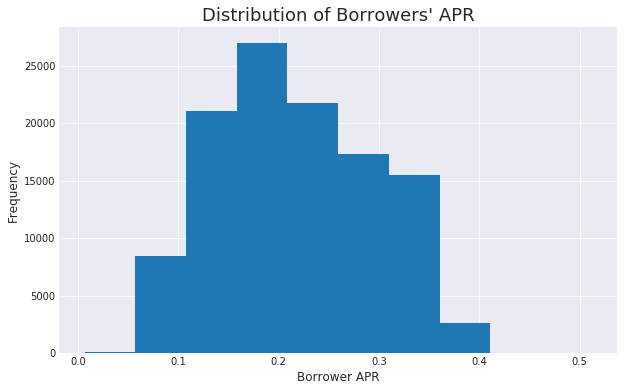

In [20]:
plt.figure(figsize=[10,6])
loan_df['BorrowerAPR'].hist()
plt.xlabel('Borrower APR', size=12)
plt.ylabel('Frequency', size=12)
plt.title("Distribution of Borrowers' APR", size=18);

> We see a greater cluster of customers having an APR between **12.5%** and **30%** with the largest chunk occuring with customers with APR of about **20%**. There are **little** or **no** customers with high APR (50% and above) that Prosper could leverage on.   

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

### Question 9: Does the Monthly Income of Borrowers have anything to do with Listing Amount?

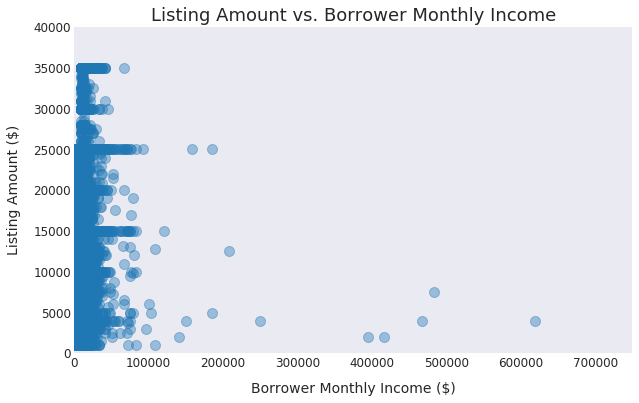

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(loan_df.StatedMonthlyIncome, loan_df.LoanOriginalAmount, 
            alpha=0.4, color=base_color, s=100);

#i set the xlim and ylim parameters having observed just a few outlier beyond income level of 500000
plt.xlim(0,750000)
plt.ylim(0,40000)

plt.xlabel('Borrower Monthly Income ($)', labelpad=12, fontsize=14)
plt.ylabel('Listing Amount ($)', labelpad=12, fontsize=14)
plt.title('Listing Amount vs. Borrower Monthly Income', fontsize=18);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

> Here we can see the distribution is concentrated in monthly income below 20,000 and listing amount below 35,000. We see no interesting trend here, Prosper lists smaller loan amounts even if the customer's monthly income is high. Could this be Prosper tyring to play safe? Since Prosper documentation caps Prosper's listing at $40,000. The concentration in lower income brackets could be due to factors that the data may not be able to explain.

### Question 10: What does a Customer's Montly Income Tell about their Monthly Repayment Propensities?

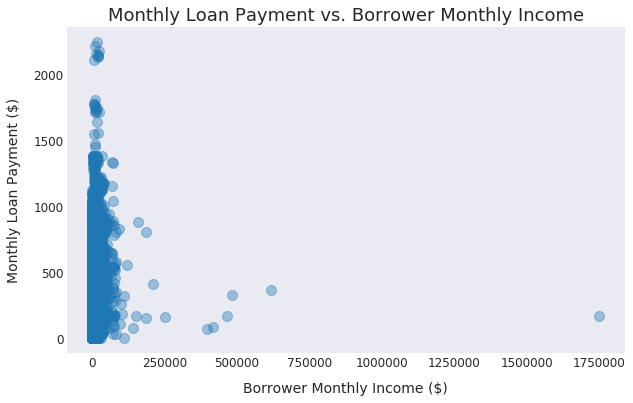

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(loan_df.StatedMonthlyIncome, loan_df.MonthlyLoanPayment, 
            alpha=0.4, color=base_color, s=100);

plt.xlabel('Borrower Monthly Income ($)', labelpad=12, fontsize=14)
plt.ylabel('Monthly Loan Payment ($)', labelpad=12, fontsize=14)
plt.title('Monthly Loan Payment vs. Borrower Monthly Income', fontsize=18);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

> As expected, we see a cluster mostly around the lower income bracket, with no reliable indication of monthly loan payment moving inn response to borrowers' monthly income. The presence of just a few outlier may indicate some practices or arrangements that are not visible or explainable by just the data.

### Question 11: How do Borrower APR Compare across Different Risk Rankings?

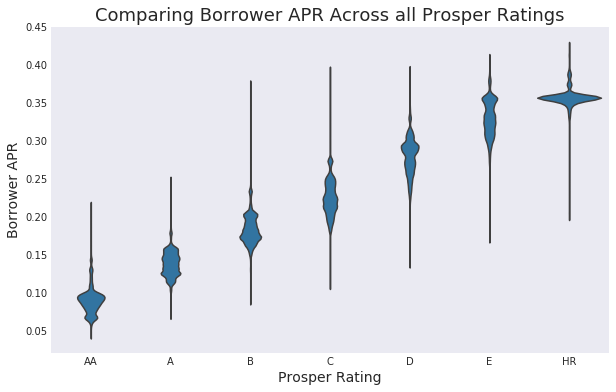

In [23]:
plt.figure(figsize=[10,6])
sns.violinplot(data = loan_df, x='ProsperRating (Alpha)', y = 'BorrowerAPR', 
               color = base_color, inner = None, order = ['AA','A','B','C','D','E','HR'])
plt.xlabel('Prosper Rating', size=14)
plt.ylabel('Borrower APR', size=14)
plt.title('Comparing Borrower APR Across all Prosper Ratings', size = 18);

> From the vizualization populated above, we see that **borrower APR decreases the better the rating.** Borrowers with the best Prosper ratings have the lowest APR. This suggests that **Prosper rating has a strong, inverse relationship with borrower APR.**

### Question 12: Can we also Infer any Relationship between Prosper Risk Rating and Listed Loan Amount?

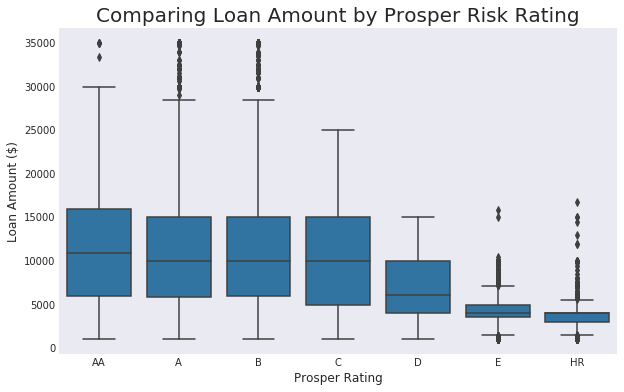

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='ProsperRating (Alpha)', y='LoanOriginalAmount',
                 data=loan_df, color=base_color, order=['AA','A','B','C','D','E','HR'], orient='v');

plt.xlabel('Prosper Rating', size=12)
plt.ylabel('Loan Amount ($)', size=12)
plt.title('Comparing Loan Amount by Prosper Risk Rating', size=20);

> The chart above shows the median listing amount in each credit rating is below $8000 which makes sense and quite agrees with what we saw earlier about Prosper mostly issuing loans of little amount. The listing amount though is observed to increase with credit rating quality. Thus, it is safe to conclude that, Prosper has indeed been playing safe (a conjecture I raised earlier).

## Multivariate Exploration

> Here, the main task is to create plots of three or more variables to investigate the data even
further.

### Question 13: How do different Risk ratings compare when Estimating the Relationship between Borrower APR and Estimated Loss for Borrowers?

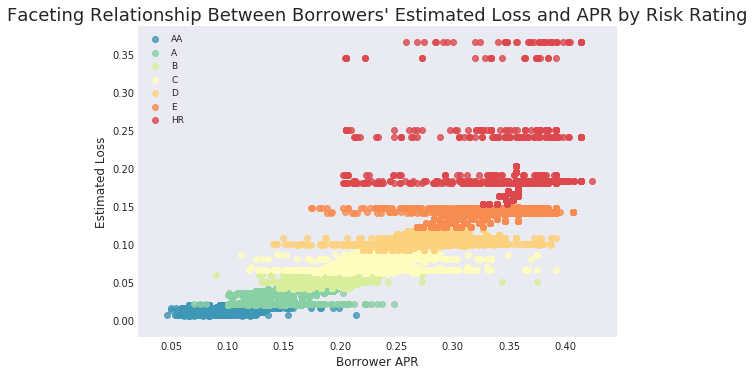

In [25]:
g = sns.FacetGrid(data = loan_df, hue = 'ProsperRating (Alpha)', hue_order = ['AA','A','B','C','D','E','HR'], 
                  size = 5, aspect = 1.5, palette="Spectral_r")
g.map(sns.regplot,'BorrowerAPR', 'EstimatedLoss', fit_reg = False)
plt.xlabel("Borrower APR", size=12)
plt.ylabel("Estimated Loss", size=12)
plt.title("Faceting Relationship Between Borrowers' Estimated Loss and APR by Risk Rating", size=18)
plt.legend(loc=2, fontsize = 9);

> We see a clear pattern here. **Low Risk borrowers** cluster around **low borrower APR and low estimated loss regions**, while **High Risk borrowers** tend to cluster around the **high borrower APR and high estimated loss** regions. <p> In general, a **positive** relationship is observed between **Borrower APR** and **Estimated Loss** and **the higher the risk factor for a borrower, the higher the trade-off between APR and Estimated Loss** for such borrower.

### Question 14: How do the Loan Status and the Risk Rating of Borrowers Relate - with respect to Average Estimated Loss?

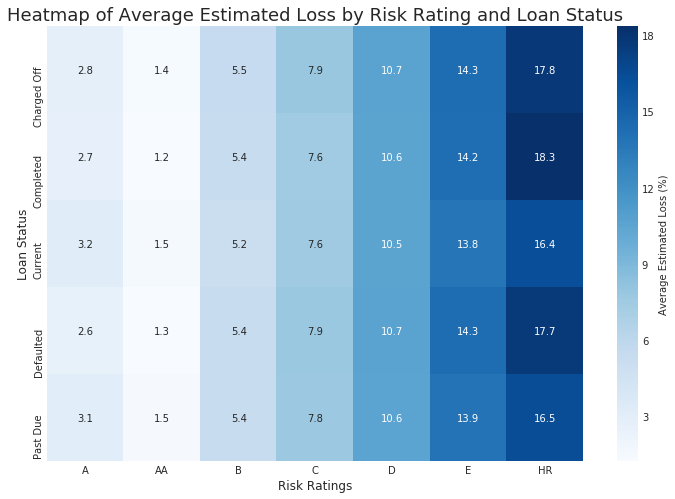

In [26]:
plt.figure(figsize = [12,8])

#grouping the dataframe by Prosper Rating and Loan Status and retrieving their mean estimated loss values 
cat_mean = loan_df.groupby(['ProsperRating (Alpha)', 'LoanStatus']).mean()['EstimatedLoss']*100
cat_mean = cat_mean.reset_index(name = 'Average Estimated Loss')
cat_mean = cat_mean.pivot(index = 'LoanStatus', columns = 'ProsperRating (Alpha)', values = 'Average Estimated Loss')

#plotting
sns.heatmap(cat_mean, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Average Estimated Loss (%)'})
plt.xlabel('Risk Ratings', size=12)
plt.ylabel('Loan Status', size=12)
plt.title('Heatmap of Average Estimated Loss by Risk Rating and Loan Status', size=18);

> From the heatmap above, there is a confirmation that Borrower's with **Rating AA** and whose **Loan Status** reads **Completed** show the **Lowest Average Estimated Loss** and we see the **Highest Average Estimated Loss** recorded for **High Risk (HR)** borrowers  whose **Loan Status** reads **Completed**, and even those whose Loan status reads **Charged off** or **Defaulted**. The major determinant of Estimated Loss proved to be the Credit Score of a Borrower. <p> This results agree with Business Domain Knowledge where it is expected that the Higher the Risk Score of a Borrower, the Higher the Business Loss expected.

### Question 15: Comparing the Relationship Between Borrower APR and Listing Amount with respect to Risk Rating, How do the Various Employment Statuses Differ?

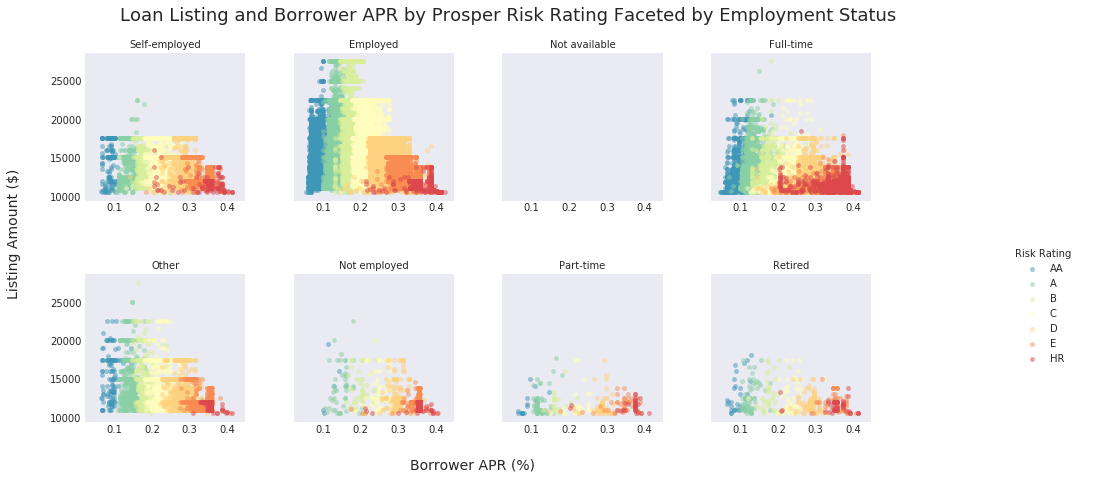

In [27]:
g = sns.FacetGrid(loan_df, col='EmploymentStatus', hue='ProsperRating (Alpha)',
                 hue_order=['AA','A','B','C','D','E','HR'],
                 palette='Spectral_r', col_wrap=4)

g.map(plt.scatter, 'BorrowerAPR','LoanOriginalAmount', s=20, linewidth=.3, alpha=.5).add_legend();

g._legend.set_title('Risk Rating')
g.set_titles('{col_name}');
g.set(xlabel='', ylabel='')

for i, ax in enumerate(g.axes):
    plt.setp(ax.get_xticklabels(), visible=True, rotation=0, y=.01)
    plt.setp(ax.set_yticklabels([5000,10000,15000,20000,25000,30000]), rotation=0)

g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.4, 0, 0));

plt.subplots_adjust(hspace=0.5, wspace=0.3)    
plt.suptitle("Loan Listing and Borrower APR by Prosper Risk Rating Faceted by Employment Status", fontsize=18, y=1.05);
g.fig.text(0.4, -0.02, s='Borrower APR (%)',fontdict={'fontsize':14});
g.fig.text(-0.01, 0.65, s='Listing Amount ($)',fontdict={'fontsize':14}, rotation = 90);

> We observe that the same general trend of small listing amounts and lower APR dominated by AA and A risk ratings still maintains here, except that we now clearly see a bias towards certain employment status (Maybe it's Prosper also playing safe by tending to give out a little bit higher amount to those who are **Employed** and/or **Full-time** employees). Also, we now see credit ranking concentration in listing amount distribution across different Employment status.<p>For example, we see that **Full-time** and **Employed** have the highest and second highest concentration of the worst credit ranking HR with high APR on small listing values (below $10000).

## Conclusions
> Some of the insights that the data revealed is the demographic distribution of Prosper's Business performance and we discovered how that they have a good footprint in California, but not so much in North Dakota, of which Most borrowers tend to be Employed and engaged in Full-Time Employmentin Professional Jobs and majority took out Prosper Loans for Loan Consolidation purposes. We see also how Prosper Rating impacts Listing Amount, and a positive correlation between Borrower APR and Prosper Rating.<p>
> And when we assessed that relationship with respect to its impact on estimated loss, we discovered that the higher the risk score, the worse (higher) the estimated loss. I did find it odd though that Average Estimated Loss is higher for Customers who completed their loans than for customers who outrightly defaulted, even though its just a slight difference, but it still pricked my interest, but availabe data may not be sufficient to carry out deeper analyses.